In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# **AVALIACAO**

In [2]:
colunas_av = ['user_id', 'filme_id', 'rating', 'timestamp']
avaliacao = pd.read_csv('./datasets/movielens/u.data', sep='\t', names=colunas_av)
avaliacao.head(20)

,user_id,filme_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [3]:
avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   filme_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


# **USERS**

In [4]:
user = pd.read_csv('./datasets/movielens/u.user', sep='|', header = None)
colunas_user = ['user_id', 'idade', 'sexo', 'profissao', 'cep']
user.columns = colunas_user
user.drop(columns = ['cep'], inplace = True)
user.head()

,user_id,idade,sexo,profissao
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [5]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    943 non-null    int64 
 1   idade      943 non-null    int64 
 2   sexo       943 non-null    object
 3   profissao  943 non-null    object
dtypes: int64(2), object(2)
memory usage: 29.6+ KB


In [6]:
valores_unicos = user['profissao'].unique()
print(valores_unicos)

['technician' 'other' 'writer' 'executive' 'administrator' 'student'
 'lawyer' 'educator' 'scientist' 'entertainment' 'programmer' 'librarian'
 'homemaker' 'artist' 'engineer' 'marketing' 'none' 'healthcare' 'retired'
 'salesman' 'doctor']


# **FILMES**

In [7]:
genero = pd.read_csv('./datasets/movielens/u.genre', sep='|', header = None)
colunas_genero = ['genero', 'id_genero']
genero.columns = colunas_genero
genero.head(19)

,genero,id_genero
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [8]:
filmes = pd.read_csv('./datasets/movielens/u.item', sep='|', encoding='ISO-8859-1', header = None)
colunas_filme = ['filme_id', 'nome_filme','lancamento' ,'3', 'url_filme', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
filmes.columns = colunas_filme
filmes.drop (columns = ['3', 'url_filme'], inplace = True)
filmes.head(20)

,filme_id,nome_filme,lancamento,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filme_id     1682 non-null   int64 
 1   nome_filme   1682 non-null   object
 2   lancamento   1681 non-null   object
 3   unknown      1682 non-null   int64 
 4   Action       1682 non-null   int64 
 5   Adventure    1682 non-null   int64 
 6   Animation    1682 non-null   int64 
 7   Childrens    1682 non-null   int64 
 8   Comedy       1682 non-null   int64 
 9   Crime        1682 non-null   int64 
 10  Documentary  1682 non-null   int64 
 11  Drama        1682 non-null   int64 
 12  Fantasy      1682 non-null   int64 
 13  Film-Noir    1682 non-null   int64 
 14  Horror       1682 non-null   int64 
 15  Musical      1682 non-null   int64 
 16  Mystery      1682 non-null   int64 
 17  Romance      1682 non-null   int64 
 18  Sci-Fi       1682 non-null   int64 
 19  Thriller     1682 non-null 

# **ANALISE**

In [116]:
num_users = avaliacao.user_id.unique().shape[0]
num_itens = avaliacao.filme_id.unique().shape[0]
print(f'Numero de usuarios: {num_users}, numero de itens: {num_itens}')

num_entradas_diferentes_de_zero = (avaliacao['rating'] != 0).sum()
dispersao = 1 - (num_entradas_diferentes_de_zero / (num_users * num_itens))
print("Dispersao: ", dispersao)

Numero de usuarios: 943, numero de itens: 1682
Dispersao:  0.9369533063577546


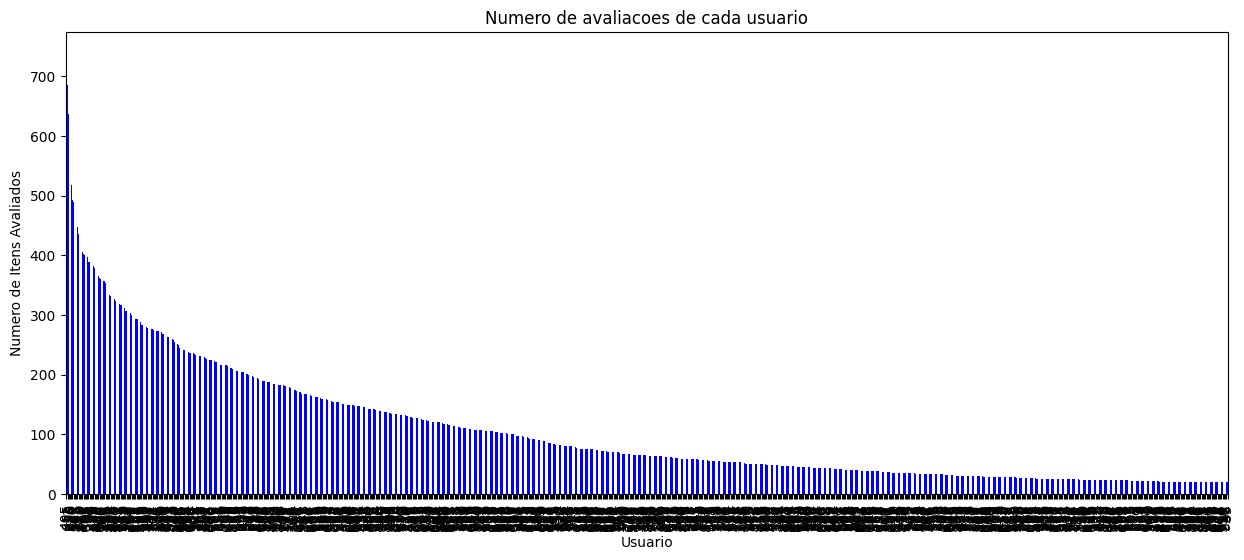

In [117]:
historico_interacoes = avaliacao['user_id'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
historico_interacoes.plot(kind='bar', color = 'blue')
plt.xlabel('Usuario')
plt.ylabel('Numero de Itens Avaliados')
plt.title('Numero de avaliacoes de cada usuario')
plt.show()

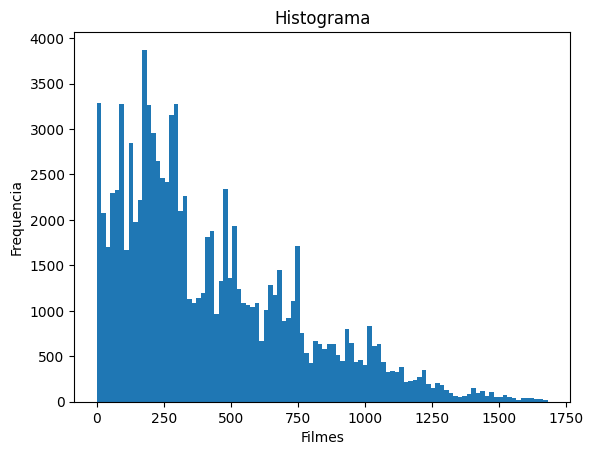

In [118]:
plt.hist(avaliacao['filme_id'], bins=100) 
plt.xlabel('Filmes')
plt.ylabel('Frequencia')
plt.title('Histograma')
plt.show()

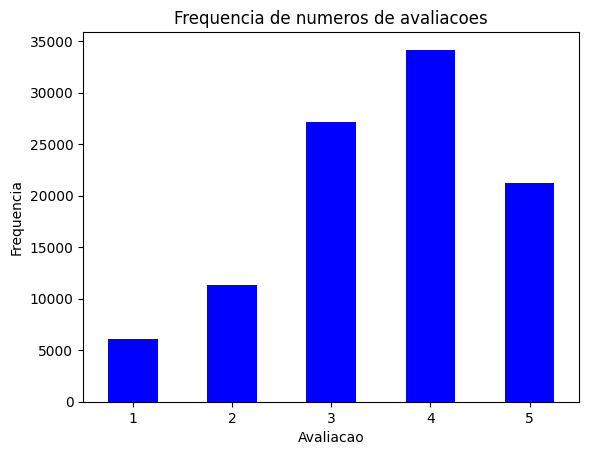

In [119]:
frequencia_classificacao = avaliacao['rating'].value_counts().sort_index()

frequencia_classificacao.plot(kind='bar', color='blue')
plt.xlabel('Avaliacao')
plt.ylabel('Frequencia')
plt.title('Frequencia de numeros de avaliacoes')
plt.xticks(rotation=0)
plt.show()

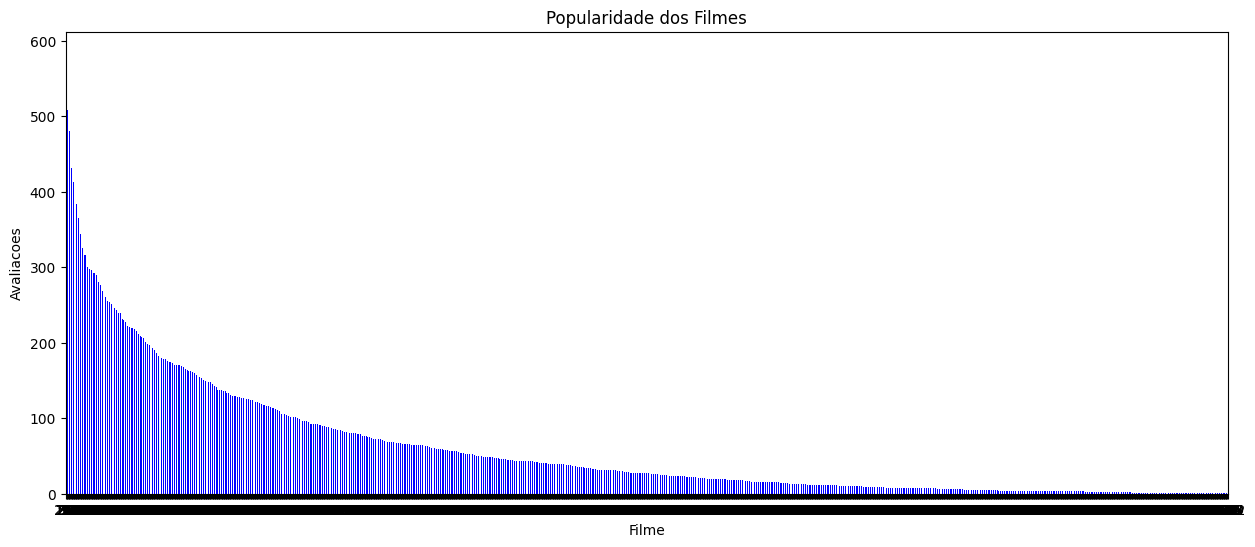

In [120]:
popularidade_itens = avaliacao.groupby('filme_id')['user_id'].nunique()

popularidade_itens = popularidade_itens.sort_values(ascending=False)

plt.figure(figsize=(15, 6))
popularidade_itens.plot(kind='bar', color = 'blue')
plt.xlabel('Filme')
plt.ylabel('Avaliacoes')
plt.title('Popularidade dos Filmes')
plt.xticks(rotation=0) 
plt.show()

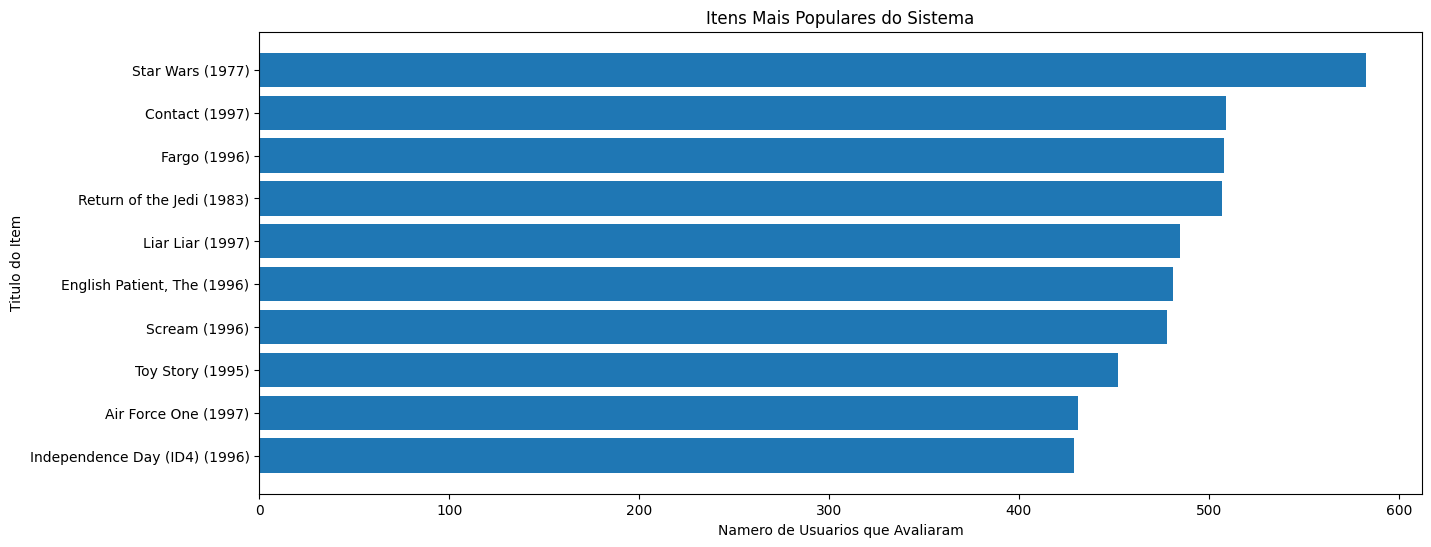

In [121]:
top10 = 10
itens_mais_populares = popularidade_itens.head(top10)

itens_mais_populares_com_titulos = pd.merge(itens_mais_populares, filmes[['filme_id', 'nome_filme']], on='filme_id', how='left')

plt.figure(figsize=(15, 6))
plt.barh(itens_mais_populares_com_titulos['nome_filme'], itens_mais_populares_com_titulos['user_id'])
plt.xlabel('Namero de Usuarios que Avaliaram')
plt.ylabel('Titulo do Item')
plt.title('Itens Mais Populares do Sistema')
plt.gca().invert_yaxis()
plt.show()

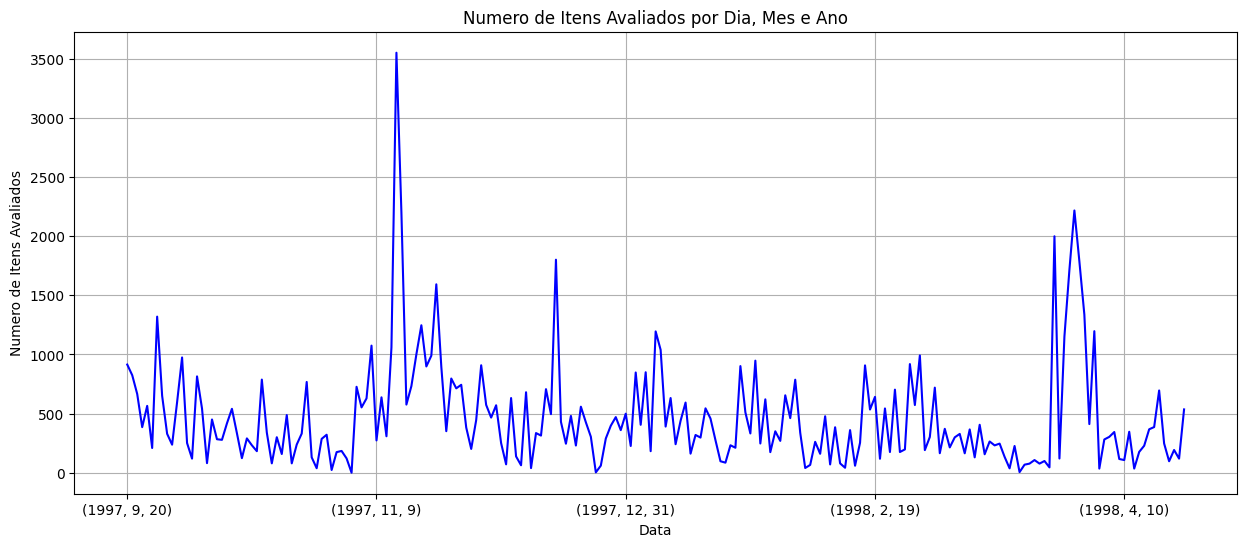

In [122]:
avaliacao['timestamp'] = pd.to_datetime(avaliacao['timestamp'], unit='s')

avaliacao['dia'] = avaliacao['timestamp'].dt.day
avaliacao['mes'] = avaliacao['timestamp'].dt.month
avaliacao['ano'] = avaliacao['timestamp'].dt.year

numero_itens_avaliados_por_dia = avaliacao.groupby(['ano', 'mes', 'dia'])['filme_id'].count()

plt.figure(figsize=(15, 6))
numero_itens_avaliados_por_dia.plot(kind='line', color='blue')
plt.xlabel('Data')
plt.ylabel('Numero de Itens Avaliados')
plt.title('Numero de Itens Avaliados por Dia, Mes e Ano')
plt.grid(True)
plt.show()

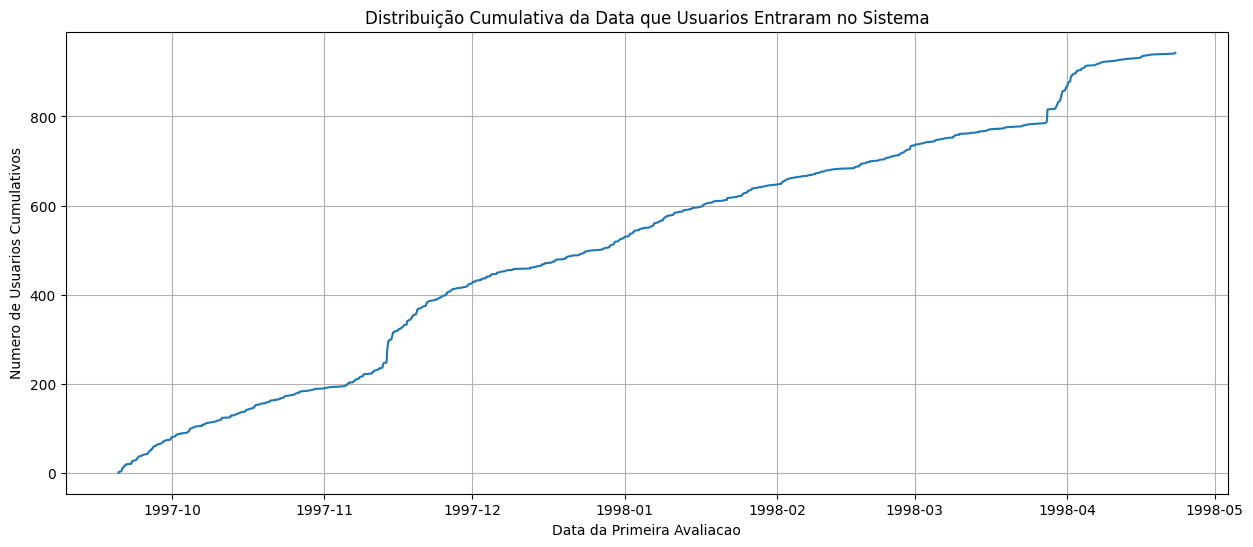

In [123]:
primeiras_datas = avaliacao.groupby('user_id')['timestamp'].min()

primeiras_datas = primeiras_datas.sort_values()

usuarios_cumulativos = range(1, len(primeiras_datas) + 1)

plt.figure(figsize=(15, 6))
plt.plot(primeiras_datas, usuarios_cumulativos)
plt.xlabel('Data da Primeira Avaliacao')
plt.ylabel('Numero de Usuarios Cumulativos')
plt.title('Distribuição Cumulativa da Data que Usuarios Entraram no Sistema')
plt.grid(True)
plt.show()

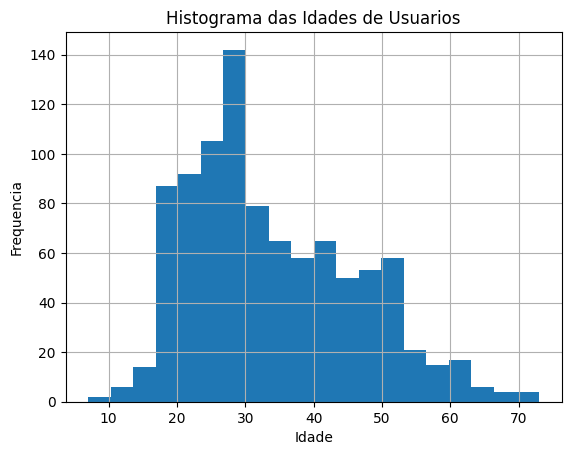

In [124]:
plt.hist(user['idade'], bins=20) 
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.title('Histograma das Idades de Usuarios')
plt.grid(True)
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


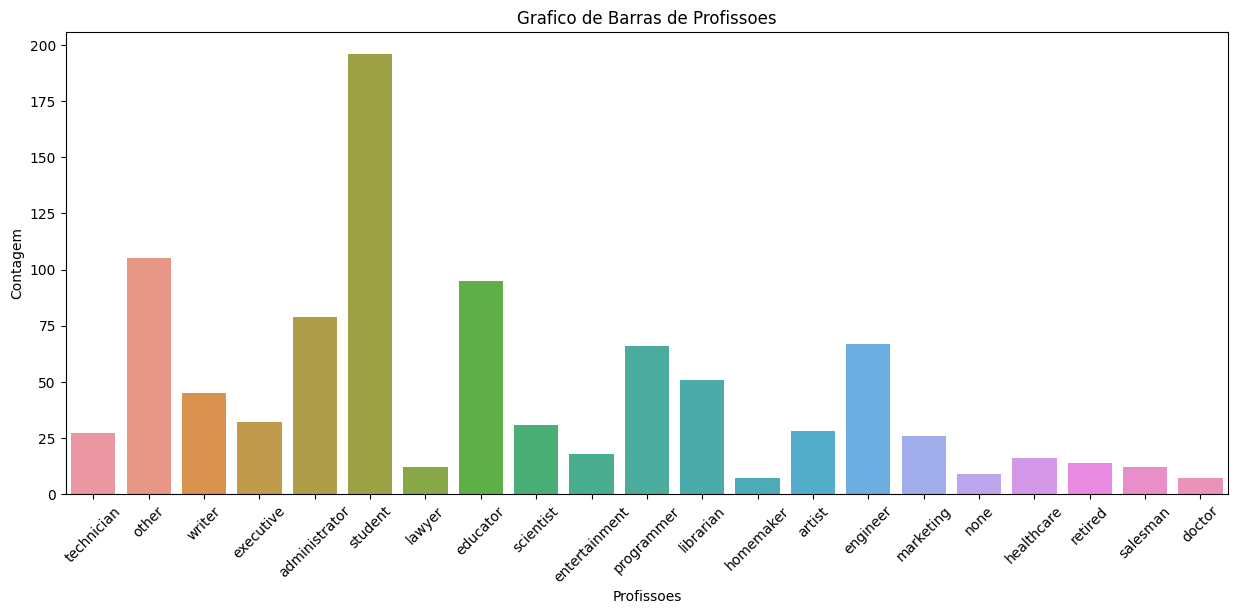

In [125]:
plt.figure(figsize=(15, 6))
sns.countplot(x=user['profissao']) 
plt.xlabel('Profissoes')
plt.ylabel('Contagem')
plt.title('Grafico de Barras de Profissoes')
plt.xticks(rotation=45)
plt.show()

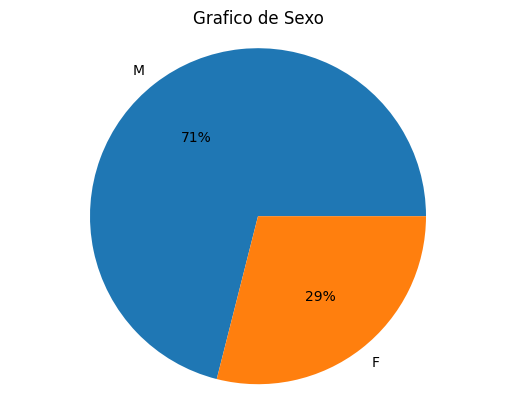

In [126]:
plt.pie(user['sexo'].value_counts(), labels=user['sexo'].value_counts().index, autopct='%1.0f%%')
plt.axis('equal')
plt.title('Grafico de Sexo')
plt.show()

In [127]:
intervalos_idade = [1, 18, 25, 35, 45, 55, 100]
rotulos_idade = ['1-17','18-24', '25-34', '35-44', '45-54', '55+']

user['faixa_etaria'] = pd.cut(user['idade'], bins=intervalos_idade, labels=rotulos_idade)

grupos_por_idade = user.groupby('faixa_etaria')

for faixa_etaria, grupo in grupos_por_idade:
    print(f"Analise para o grupo de idade: {faixa_etaria}")
    print(f"Total de usuarios: {len(grupo)}")
    print(f"Media de idade: {grupo['idade'].mean()}")
    
user.head(3)

Analise para o grupo de idade: 1-17
Total de usuarios: 54
Media de idade: 16.055555555555557
Analise para o grupo de idade: 18-24
Total de usuarios: 218
Media de idade: 22.220183486238533
Analise para o grupo de idade: 25-34
Total de usuarios: 299
Media de idade: 30.05685618729097
Analise para o grupo de idade: 35-44
Total de usuarios: 182
Media de idade: 40.33516483516483
Analise para o grupo de idade: 45-54
Total de usuarios: 138
Media de idade: 49.927536231884055
Analise para o grupo de idade: 55+
Total de usuarios: 52
Media de idade: 61.19230769230769


C:\Users\User\AppData\Local\Temp\ipykernel_11500\1697557865.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos_por_idade = user.groupby('faixa_etaria')


,user_id,idade,sexo,profissao,faixa_etaria
0,1,24,M,technician,18-24
1,2,53,F,other,45-54
2,3,23,M,writer,18-24


C:\Users\User\AppData\Local\Temp\ipykernel_11500\3038960430.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados = avaliacoes_com_generos.groupby(user['faixa_etaria'])[filmes.columns[3:]].mean()


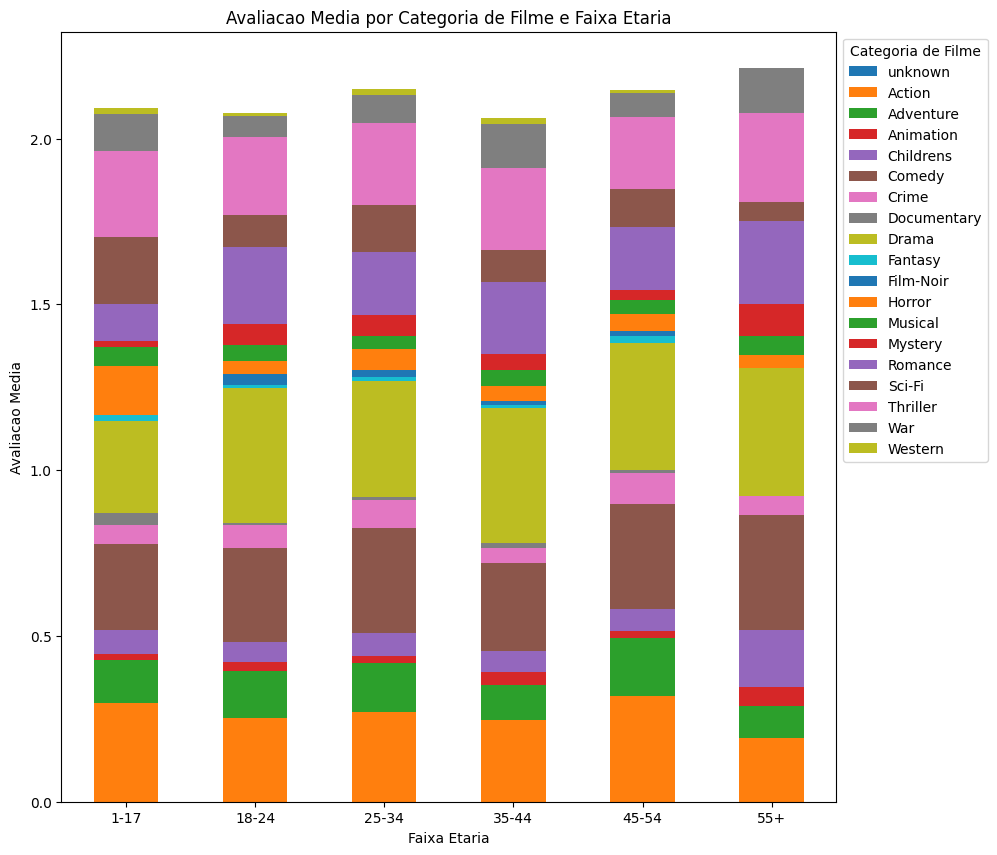

In [128]:
avaliacoes_com_generos = pd.merge(avaliacao, filmes, on='filme_id', how='left')
resultados = avaliacoes_com_generos.groupby(user['faixa_etaria'])[filmes.columns[3:]].mean()

resultados.plot(kind='bar', stacked=True, figsize=(10, 10))

plt.xlabel('Faixa Etaria')
plt.ylabel('Avaliacao Media')
plt.title('Avaliacao Media por Categoria de Filme e Faixa Etaria')
plt.legend(title='Categoria de Filme', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

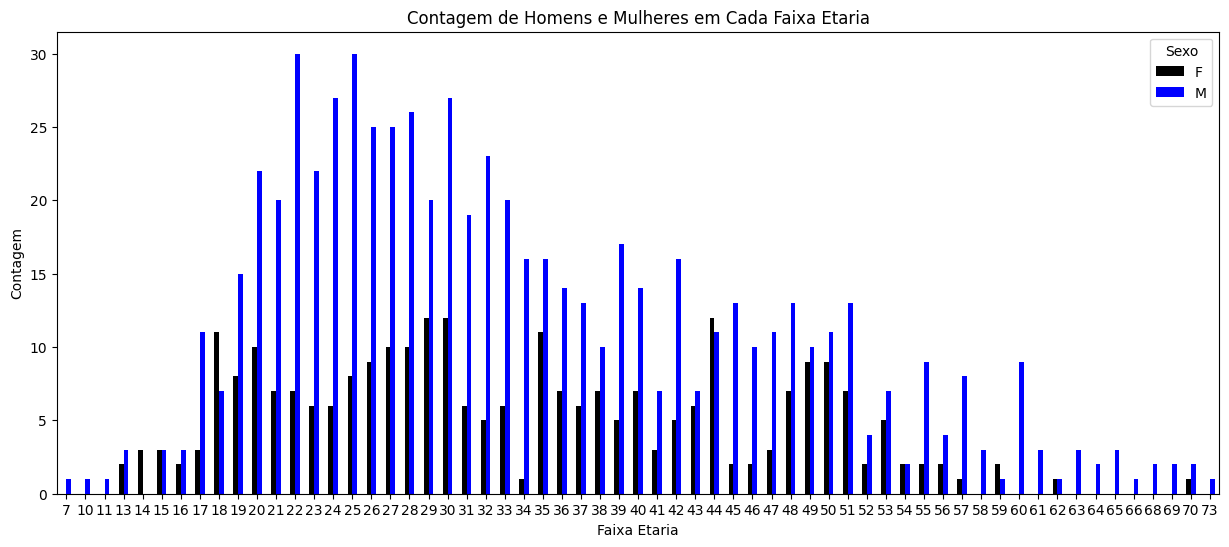

In [129]:
grupo_idade_sexo = user.groupby(['idade', 'sexo']).size().unstack()

grupo_idade_sexo.plot(kind='bar', color = ['black','blue'], figsize=(15, 6))
plt.xlabel('Faixa Etaria')
plt.ylabel('Contagem')
plt.title('Contagem de Homens e Mulheres em Cada Faixa Etaria')
plt.legend(title='Sexo')
plt.xticks(rotation=0)
plt.show()

<Figure size 1500x600 with 0 Axes>

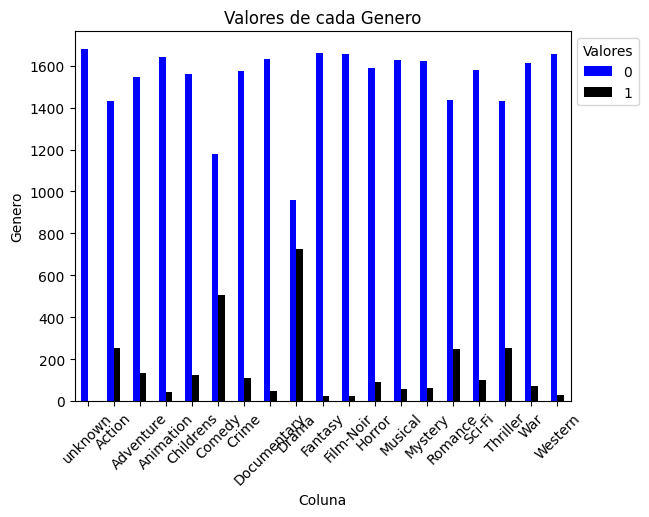

In [130]:
contagem_total = pd.DataFrame()

for coluna in filmes.columns[3:]:
    contagem = filmes[coluna].value_counts()
    nome_coluna = f'{coluna}'
    contagem_total = pd.concat([contagem_total, contagem.rename(nome_coluna)], axis=1, sort=False)

contagem_total = contagem_total.T

plt.figure(figsize=(15, 6))
contagem_total.plot(kind='bar', color = ['blue','black'])
plt.xlabel('Coluna')
plt.ylabel('Genero')
plt.title('Valores de cada Genero')
plt.xticks(rotation=45)
plt.legend(title='Valores', bbox_to_anchor=(1, 1))
plt.show()

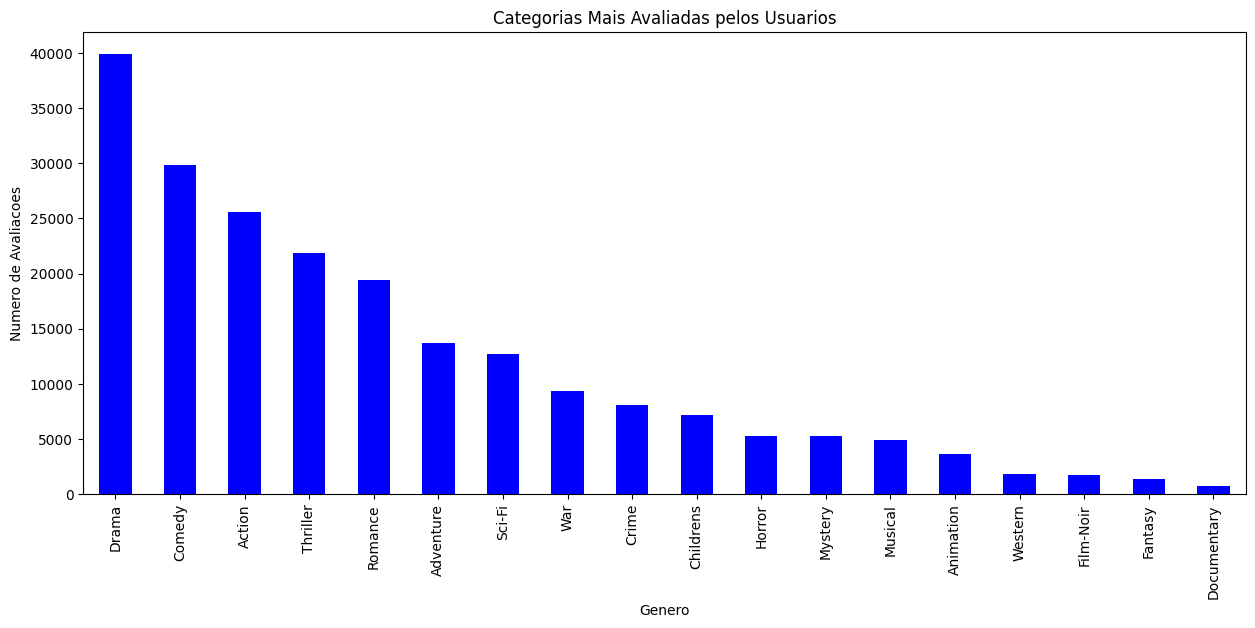

In [131]:
avaliacoes_com_generos = pd.merge(avaliacao, filmes[['filme_id', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']], on='filme_id', how='left')

total_avaliacoes_por_genero = avaliacoes_com_generos[['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

total_avaliacoes_por_genero = total_avaliacoes_por_genero.sort_values(ascending=False)

plt.figure(figsize=(15, 6))
total_avaliacoes_por_genero.plot(kind='bar', color='blue')
plt.xlabel('Genero')
plt.ylabel('Numero de Avaliacoes')
plt.title('Categorias Mais Avaliadas pelos Usuarios')
plt.show()

# **Matrix Factorization**

In [10]:
avaliacao.drop(columns= 'timestamp', inplace=True)
avaliacao.head()

,user_id,filme_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [11]:
df = avaliacao.pivot(index='user_id', columns = 'filme_id', values='rating')

df = df.fillna(0)
df.head()

filme_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Columns: 1682 entries, 1 to 1682
dtypes: float64(1682)
memory usage: 12.1 MB


In [13]:
#criar um mapeamento para traduzir índices de 1 a n para 0 a n-1
user_mapping = {user_id: user_id - 1 for user_id in df.index}
item_mapping = {item_id: item_id - 1 for item_id in df.columns}

#aplicar o mapeamento aos dados originais
df_mapped = df.rename(index=user_mapping, columns=item_mapping)

In [14]:
df_mapped.tail()

filme_id,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
user_id,,,,,,,,,,,,,,,,,,,,,
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#dividir conjunto de train, test, val
train, test_val = train_test_split(df_mapped, test_size=0.3, random_state= 11)
test, val = train_test_split(test_val, train_size=0.15, random_state= 11)

In [16]:
#inicializacao dos fatos com valores proximo a 0
def initialize_factors(num_users, num_itens, latent_dim):
    user_factors = np.random.uniform(-0.5, 0.5, size = (num_users, latent_dim))
    item_factors = np.random.uniform(-0.5, 0.5, size = (num_itens, latent_dim))
    return user_factors, item_factors


In [21]:
#inicializar matriz de fatorizacao
num_users = df_mapped.index.max() + 1
num_itens = df_mapped.columns.max() + 1

#definir hierparemetros 
latent_dim = 256
learning_rate = 0.0005
num_epochs = 100
lambda_reg = 0.03

#inicializar fatores de usuario e itens
user_factors, item_factors = initialize_factors(num_users, num_itens, latent_dim)

In [22]:
best_mse = float('inf')  # Inicialize a melhor RMSE com um valor muito alto

#treinar o modelo usando gradient descent
for epoch in tqdm(range(num_epochs), "Epoca: "):
    # Calcular a previsão e o erro
    prediction = np.matmul(user_factors, item_factors.T)  # Produto escalar
    erro = df_mapped.values - prediction

    # Atualizar os valores de fatorização usando gradient descent
    user_factors += learning_rate * (2 * np.matmul(erro, item_factors) - lambda_reg * user_factors)
    item_factors += learning_rate * (2 * np.matmul(erro.T, user_factors) - lambda_reg * item_factors)

    # Calcule as previsões apenas nas posições do conjunto de treinamento
    train_predictions = np.dot(user_factors, item_factors.T)

    # Calcule o MSE apenas nas posições do conjunto de treinamento
    train_mse = np.mean((df_mapped.values - train_predictions) ** 2)
    print("MSE Train:", train_mse)

    #calcule o MSE no conjunto de validação
    val_predictions = np.dot(user_factors[val.index], item_factors[val.columns].T)
    val_mse = np.mean((val.values - val_predictions) ** 2)
    print("MSE Validação: ", val_mse)
                
    if val_mse < best_mse:
        best_mse = val_mse
        best_user_factors = user_factors.copy()  # Salve os melhores fatores de usuário
        best_item_factors = item_factors.copy()  # Salve os melhores fatores de item
print("Melhor MSE na Validação:", best_mse)

test_predicions = np.dot(best_user_factors[test.index], best_item_factors[test.columns].T)
test_mse = np.mean((test_predicions - test.values) ** 2)
print("Mse Teste:", test_mse)

Epoca:   2%|▏         | 2/100 [00:00<00:07, 12.61it/s]

MSE Train: 1.858477476162652
MSE Validação:  1.839697617317788
MSE Train: 1.4433719154088835
MSE Validação:  1.428293428540828
MSE Train: 1.1394923862532653
MSE Validação:  1.1273486433789242


Epoca:   6%|▌         | 6/100 [00:00<00:06, 13.96it/s]

MSE Train: 0.9076644275343618
MSE Validação:  0.896866194566263
MSE Train: 0.7867044621015221
MSE Validação:  0.7766979359470149
MSE Train: 0.7096761235908274
MSE Validação:  0.7007230640393253
MSE Train: 0.6511993234512016
MSE Validação:  0.6432365228419583


Epoca:  10%|█         | 10/100 [00:00<00:06, 14.60it/s]

MSE Train: 0.6041202593688636
MSE Validação:  0.5970882773121415
MSE Train: 0.5651858992701311
MSE Validação:  0.5589563022172916
MSE Train: 0.5326659926997178
MSE Validação:  0.5270597505916473
MSE Train: 0.5054076066245017
MSE Validação:  0.5002379988904264


Epoca:  14%|█▍        | 14/100 [00:00<00:06, 13.89it/s]

MSE Train: 0.48244254053880886
MSE Validação:  0.4775532978868059
MSE Train: 0.46290510140397045
MSE Validação:  0.45818495710100987
MSE Train: 0.4460642403511587
MSE Validação:  0.44144170003036604


Epoca:  16%|█▌        | 16/100 [00:01<00:06, 12.99it/s]

MSE Train: 0.4313458158247842
MSE Validação:  0.4267767382323429
MSE Train: 0.4183179936117965
MSE Validação:  0.41377457473422213
MSE Train: 0.40665814148010465
MSE Validação:  0.40212181113202533


Epoca:  20%|██        | 20/100 [00:01<00:06, 12.59it/s]

MSE Train: 0.3961206772993154
MSE Validação:  0.3915782481102994
MSE Train: 0.3865137288481097
MSE Validação:  0.38195546146415804
MSE Train: 0.3776842978355656
MSE Validação:  0.37310287391629926


Epoca:  22%|██▏       | 22/100 [00:01<00:05, 13.10it/s]

MSE Train: 0.36950902742651687
MSE Validação:  0.3648988839713522
MSE Train: 0.3618880498983002
MSE Validação:  0.35724485010891005
MSE Train: 0.3547404490222459
MSE Validação:  0.3500606329631696


Epoca:  26%|██▌       | 26/100 [00:01<00:05, 13.52it/s]

MSE Train: 0.3480006600157627
MSE Validação:  0.34328108312085304
MSE Train: 0.3416155267626112
MSE Validação:  0.3368532035404746
MSE Train: 0.33554188594098255
MSE Validação:  0.33073384294289926
MSE Train: 0.3297445919683184
MSE Validação:  0.32488781741699474


Epoca:  30%|███       | 30/100 [00:02<00:05, 13.87it/s]

MSE Train: 0.3241949105994955
MSE Validação:  0.3192863769125257
MSE Train: 0.31886921879634744
MSE Validação:  0.313905950632919
MSE Train: 0.31374795837839775
MSE Validação:  0.3087271212560438
MSE Train: 0.30881479970266645
MSE Validação:  0.30373378997805167


Epoca:  34%|███▍      | 34/100 [00:02<00:04, 14.06it/s]

MSE Train: 0.30405597838700293
MSE Validação:  0.2989125020460417
MSE Train: 0.2994597732272636
MSE Validação:  0.29425190689303327
MSE Train: 0.2950160977163711
MSE Validação:  0.2897423298127252
MSE Train: 0.2907161815170779
MSE Validação:  0.28537543449379926


Epoca:  38%|███▊      | 38/100 [00:02<00:04, 14.18it/s]

MSE Train: 0.2865523220793621
MSE Validação:  0.281143958231678
MSE Train: 0.2825176902773998
MSE Validação:  0.2770415043334189
MSE Train: 0.27860617731788984
MSE Validação:  0.27306237897643354
MSE Train: 0.2748122731038003
MSE Validação:  0.2692014623706323


Epoca:  42%|████▏     | 42/100 [00:03<00:04, 14.42it/s]

MSE Train: 0.2711309686550047
MSE Validação:  0.26545410635107364
MSE Train: 0.267557677090462
MSE Validação:  0.26181605241700806
MSE Train: 0.2640881691176718
MSE Validação:  0.25828336572542593
MSE Train: 0.26071852003264373


Epoca:  44%|████▍     | 44/100 [00:03<00:03, 14.42it/s]

MSE Validação:  0.2548523816808832
MSE Train: 0.2574450659918757
MSE Validação:  0.25151966259906655
MSE Train: 0.2542643678540619
MSE Validação:  0.24828196252479404


Epoca:  48%|████▊     | 48/100 [00:03<00:03, 13.39it/s]

MSE Train: 0.25117318126711263
MSE Validação:  0.24513619871593023
MSE Train: 0.24816843194460572
MSE Validação:  0.2420794286125848
MSE Train: 0.2452471952704691
MSE Validação:  0.23910883133406202


Epoca:  50%|█████     | 50/100 [00:03<00:03, 12.99it/s]

MSE Train: 0.24240667951619527
MSE Validação:  0.23622169291198658
MSE Train: 0.2396442120676451
MSE Validação:  0.2334153945959481
MSE Train: 0.23695722814919049
MSE Validação:  0.23068740367055512


Epoca:  54%|█████▍    | 54/100 [00:03<00:03, 13.07it/s]

MSE Train: 0.23434326160826555
MSE Validação:  0.228035266307976
MSE Train: 0.2317999373875713
MSE Validação:  0.22545660205279558
MSE Train: 0.22932496536775557
MSE Validação:  0.2229490995992236


Epoca:  56%|█████▌    | 56/100 [00:04<00:03, 13.29it/s]

MSE Train: 0.22691613531199706
MSE Validação:  0.22051051357603124
MSE Train: 0.22457131268660346
MSE Validação:  0.21813866210307203
MSE Train: 0.2222884351691494
MSE Validação:  0.21583142492549415


Epoca:  60%|██████    | 60/100 [00:04<00:02, 13.61it/s]

MSE Train: 0.22006550968844582
MSE Validação:  0.213586741968301
MSE Train: 0.21790060986908402
MSE Validação:  0.21140261218519973
MSE Train: 0.21579187377789508
MSE Validação:  0.2092770926021932


Epoca:  62%|██████▏   | 62/100 [00:04<00:02, 13.48it/s]

MSE Train: 0.21373750189072674
MSE Validação:  0.20720829747859137
MSE Train: 0.21173575521582153
MSE Validação:  0.20519439752655635
MSE Train: 0.20978495352511084
MSE Validação:  0.20323361914543223


Epoca:  66%|██████▌   | 66/100 [00:04<00:02, 13.62it/s]

MSE Train: 0.2078834736572298
MSE Validação:  0.20132424363942714
MSE Train: 0.20602974786630193
MSE Validação:  0.1994646063971311
MSE Train: 0.20422226219883718
MSE Validação:  0.19765309601926068


Epoca:  68%|██████▊   | 68/100 [00:04<00:02, 13.49it/s]

MSE Train: 0.2024595548876514
MSE Validação:  0.19588815338724633
MSE Train: 0.2007402147568402
MSE Validação:  0.1941682706701142
MSE Train: 0.1990628796356813
MSE Validação:  0.19249199027078676


Epoca:  72%|███████▏  | 72/100 [00:05<00:02, 13.04it/s]

MSE Train: 0.19742623478215712
MSE Validação:  0.19085790371565475
MSE Train: 0.1958290113186954
MSE Validação:  0.1892646504932003
MSE Train: 0.19426998468394374
MSE Validação:  0.1877109168487417


Epoca:  74%|███████▍  | 74/100 [00:05<00:01, 13.34it/s]

MSE Train: 0.1927479731050236
MSE Validação:  0.18619543454312443
MSE Train: 0.19126183609488348
MSE Validação:  0.18471697958351393
MSE Train: 0.18981047297923426
MSE Validação:  0.1832743709344397


Epoca:  76%|███████▌  | 76/100 [00:05<00:01, 13.51it/s]

MSE Train: 0.1883928214571452
MSE Validação:  0.18186646921696928
MSE Train: 0.1870078561988386
MSE Validação:  0.18049217540343498
MSE Train: 0.1856545874835727
MSE Validação:  0.1791504295145336


Epoca:  80%|████████  | 80/100 [00:05<00:01, 12.62it/s]

MSE Train: 0.1843320598798325
MSE Validação:  0.1778402093249422
MSE Train: 0.18303935096937624
MSE Validação:  0.1765605290828631
MSE Train: 0.18177557011604703
MSE Validação:  0.17531043824817338


Epoca:  84%|████████▍ | 84/100 [00:06<00:01, 13.33it/s]

MSE Train: 0.18053985727969243
MSE Validação:  0.17408902025313394
MSE Train: 0.17933138187502645
MSE Validação:  0.17289539128892029
MSE Train: 0.17814934167485053
MSE Validação:  0.17172869912060362
MSE Train: 0.17699296175670037
MSE Validação:  0.17058812193262607


Epoca:  88%|████████▊ | 88/100 [00:06<00:00, 13.55it/s]

MSE Train: 0.1758614934917274
MSE Validação:  0.16947286720629473
MSE Train: 0.17475421357441695
MSE Validação:  0.16838217063036617
MSE Train: 0.17367042309162514
MSE Validação:  0.16731529504539625
MSE Train: 0.17260944662932826
MSE Validação:  0.1662715294221984


Epoca:  92%|█████████▏| 92/100 [00:06<00:00, 13.86it/s]

MSE Train: 0.17157063141544754
MSE Validação:  0.16525018787446988
MSE Train: 0.17055334649712053
MSE Validação:  0.16425060870541708
MSE Train: 0.16955698195081279
MSE Validação:  0.1632721534880184
MSE Train: 0.16858094812372143
MSE Validação:  0.1623142061784172


Epoca:  96%|█████████▌| 96/100 [00:07<00:00, 14.14it/s]

MSE Train: 0.16762467490498456
MSE Validação:  0.16137617226181408
MSE Train: 0.16668761102528742
MSE Validação:  0.16045747793013973
MSE Train: 0.16576922338353112
MSE Validação:  0.15955756929071901
MSE Train: 0.1648689963993152
MSE Validação:  0.1586759116050883


Epoca: 100%|██████████| 100/100 [00:07<00:00, 13.61it/s]

MSE Train: 0.16398643139005759
MSE Validação:  0.1578119885570938
MSE Train: 0.16312104597165691
MSE Validação:  0.15696530154937485
MSE Train: 0.16227237348166698
MSE Validação:  0.15613536902732814
Melhor MSE na Validação: 0.15613536902732814
Mse Teste: 0.16724726476190602


## **Métricas**

In [24]:
#limite de previsão
threshold = 2

#calcular o TP, FP e FN
predicted_positive = test_predicions > threshold
actual_positive = test.values > threshold
TP = np.sum(predicted_positive & actual_positive)
FP = np.sum(predicted_positive & ~actual_positive)
FN = np.sum(~predicted_positive & actual_positive)

#calcular a precisão
precision = TP / (TP + FP)
#calcular o recall
recall = TP / (TP + FN)
#calcular o F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precisao: ", precision)
print("Recall: ", recall)
print("F1-score : ", f1_score)

Precisao:  0.9549938347718866
Recall:  0.834365741987611
F1-score :  0.8906137703032916


In [25]:
def precision_recall(itens_avaliados, recomendacoes_item):
    precision = 0
    TP = 0
    FP = 0
    for i in recomendacoes_item:
        if i in itens_avaliados:
            TP += 1
        else:
            FP += 1
    precision = TP / (TP + FP)

    recall = 0
    FN = 0
    for i in itens_avaliados:
        if i not in recomendacoes_item:
            FN += 1
    recall = TP / (TP + FN)

    return precision, recall

# **Recomendação**

In [ ]:
def recommend_CF(df_mapped, similaridade_usuarios, user_index, num_itens_to_recommend):
    pontuacoes_de_recomendacao = np.dot(similaridade_usuarios[user_index], df_mapped) #calcule a pontuação de recomendacao para todos os itens

    itens_recomendados = np.argsort(pontuacoes_de_recomendacao)[::-1]
    itens_recomendados = itens_recomendados[:num_itens_to_recommend]

    return itens_recomendados

## *User Colaborative Filtering*

In [26]:
#normalizar os user factors usando a normal euclidiana
user_factors_normalized = user_factors/np.linalg.norm(user_factors, axis=1, keepdims=True) 
#calcula o produto escalar entre os pares de user
dot_product_matrix_user = np.matmul(user_factors_normalized, user_factors_normalized.T)
#calcula a matriz de similaridade de cosseno
similaridade_usuarios = dot_product_matrix_user

In [27]:
def recommend_UCF(df_mapped, similaridade_usuarios, user_index, num_itens_to_recommend):
    pontuacoes_de_recomendacao = np.dot(similaridade_usuarios[user_index], df_mapped) #calcule a pontuação de recomendacao para todos os itens

    itens_recomendados = np.argsort(pontuacoes_de_recomendacao)[::-1]
    itens_recomendados = itens_recomendados[:num_itens_to_recommend]

    return itens_recomendados

In [28]:
total_precision = 0
total_recall = 0

for index, row in df_mapped.iterrows():
    user_id = index
    item_avaliados = np.where(df_mapped[user_id] != 0)[0]

    quantidade_itens_avaliados = len(item_avaliados)

    recomendacoes_item = recommend_UCF(df_mapped, similaridade_usuarios, user_id, quantidade_itens_avaliados)
    precision, recall = precision_recall(item_avaliados, recomendacoes_item)

    total_precision += precision
    total_recall += recall

media_precision = total_precision / len(df_mapped)
media_recall = total_recall / len(df_mapped) 
f1_score = 2 * (media_precision * media_recall) / (media_precision + media_recall)

print("Média de Precision:", media_precision)
print("Média de Recall:", media_recall)
print("F1-score : ", f1_score)

Média de Precision: 0.1154121524286365
Média de Recall: 0.1154121524286365
F1-score :  0.1154121524286365


## *Item Colaborative Filtering*

In [29]:
#normalizar os user factors usando a normal euclidiana
item_factors_normalized = item_factors/np.linalg.norm(item_factors, axis=1, keepdims=True) 
#calcula o produto escalar entre os pares de user
dot_product_matrix_item = np.matmul(item_factors_normalized, item_factors_normalized.T)
#calcula a matriz de similaridade de cosseno
similaridade_itens = dot_product_matrix_item

In [30]:
def recommend_ICF(df_mapped, similaridade_itens, user_index, num_itens_to_recommend):
    pontuacoes_de_recomendacao = np.dot(df_mapped, similaridade_itens[user_index])  #calcular as pontuações de recomendacao

    itens_recomendados = np.argsort(pontuacoes_de_recomendacao)[::-1]
    itens_recomendados = itens_recomendados[:num_itens_to_recommend]

    return itens_recomendados

In [31]:
total_precision = 0
total_recall = 0

for index, row in df_mapped.iterrows():
    user_id = index
    itens_avaliados = np.where(df_mapped[user_id] != 0)[0]

    quantidade_itens_avaliados = len(itens_avaliados)

    recomendacoes_itens = recommend_ICF(df_mapped, similaridade_itens, user_id, quantidade_itens_avaliados)
    precision, recall = precision_recall(itens_avaliados, recomendacoes_itens)

    total_precision += precision
    total_recall += recall

media_precision = total_precision / len(df_mapped)
media_recall = total_recall / len(df_mapped) 
f1_score = 2 * (media_precision * media_recall) / (media_precision + media_recall)

print("Média de Precision:", media_precision)
print("Média de Recall:", media_recall)
print("F1-score : ", f1_score)

Média de Precision: 0.6341885202653401
Média de Recall: 0.6341885202653401
F1-score :  0.6341885202653401
